In [ ]:
"""
Goal: Debug ISS Problem
"""

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm

In [ ]:
NT = 100
times = np.zeros(NT)
heights = np.zeros(NT)
velocities = np.zeros(NT)

In [ ]:
heights[0] = 20 # meters
g = -9.8 # m/s^2

In [ ]:
def updateVelocity (time):
    return g*time

In [ ]:
def updateHeight (time):
    return heights[0] + velocities[0]*time + 0.5*g*time**2

In [ ]:
now = 0
while heights[now] > 0:
    now += 1
    times[now] = times[now-1] + 0.1
    
    velocities[now] = updateVelocity(times[now])
    heights[now]    =   updateHeight(times[now])

In [ ]:
indices    = np.where(heights > 0)

heights    =    heights[indices[0]]
velocities = velocities[indices[0]]
times      =      times[indices[0]]

In [ ]:
fig,axs = plt.subplots(2)
axs[0].plot(times, heights, color="blue", label="height")
axs[1].plot(times, velocities, color="green", label="velocity")
#axs[0].legend()
axs[1].set_xlabel("time [s]")
axs[0].set_ylabel("height [m]")
axs[1].set_ylabel("velocity [m/s]")
plt.savefig("dropped_ball.png")
plt.show()

In [ ]:
# Goal Kick

In [ ]:
NT = 100
times = np.zeros(NT)
heights = np.zeros(NT)
velocities_y = np.zeros(NT)
distances = np.zeros(NT)
velocities_x = np.zeros(NT)

In [ ]:
g = -9.8

initial_height = 0
initial_velocity = 20
kick_angle = 45
angle_rad = np.radians(kick_angle)

initial_velocity_x = initial_velocity * np.cos(angle_rad)
initial_velocity_y = initial_velocity * np.sin(angle_rad)

In [ ]:
def update_vertical_velocity(time):
    return initial_velocity_y + g * time

In [ ]:
def update_distance(time):
    return initial_velocity_x * time

In [ ]:
def update_height(time):
    return initial_height + initial_velocity_y * time + 0.5 * g * time ** 2

In [ ]:
def update_horizontal_velocity(time):
    return initial_velocity_x

In [ ]:
now = 0
while heights[now] >= 0 and now < NT - 1:
    now += 1
    times[now] = times[now - 1] + 0.1

    velocities_y[now] = update_vertical_velocity(times[now])
    velocities_x[now] = update_horizontal_velocity(times[now])
    
    heights[now] = update_height(times[now])
    distances[now] = update_distance(times[now])

In [ ]:
valid_indices = np.where(times > 0)
times = np.append(times[0], times[valid_indices])
heights = np.append(heights[0], heights[valid_indices])
velocities_y = np.append(velocities_y[0], velocities_y[valid_indices])
distances = np.append(distances[0], distances[valid_indices])
velocities_x = np.append(velocities_x[0], velocities_x[valid_indices])

In [ ]:
fig, axs = plt.subplots(4, figsize=(10, 20))
axs[0].plot(times, heights, color="blue")
axs[1].plot(times, velocities_y, color="green")
axs[2].plot(times, distances, color="red")
axs[3].plot(times, velocities_x, color="orange")

axs[0].set_xlabel("Time [s]")
axs[0].set_ylabel("Height [m]")
axs[1].set_xlabel("Time [s]")
axs[1].set_ylabel("Vertical Velocity [m/s]")
axs[2].set_xlabel("Time [s]")
axs[2].set_ylabel("Displacement [m]")
axs[3].set_xlabel("Time [s]")
axs[3].set_ylabel("Horizontal Velocity [m/s]")

plt.savefig("goal_kick.png")
plt.show()

In [ ]:
# Goal Kick V2

In [ ]:
class SoccerBall:
    def __init__(self, NT, initial_height, initial_velocity, kick_angle, g, dt):
        self.NT = NT
        self.g = g
        self.dt = dt
        
        self.current_time = 0
        self.initial_height = initial_height
        self.initial_velocity = initial_velocity
        self.kick_angle = np.radians(kick_angle)
        
        self.initial_velocity_x = initial_velocity * np.cos(self.kick_angle)
        self.initial_velocity_y = initial_velocity * np.sin(self.kick_angle)
        
        self.times = np.zeros(NT)
        self.heights = np.zeros(NT)
        self.velocities_y = np.zeros(NT)
        self.distances = np.zeros(NT)
        self.velocities_x = np.zeros(NT)
        
        self.heights[0] = initial_height
        self.velocities_x[0] = self.initial_velocity_x
        self.velocities_y[0] = self.initial_velocity_y

        self.simulate()
        self.plot_results()

    def update_vertical_velocity(self):
        return self.initial_velocity_y + self.g * self.current_time

    def update_horizontal_velocity(self):
        return self.initial_velocity_x

    def update_height(self):
        return self.initial_height + self.initial_velocity_y * self.current_time + \
        0.5 * self.g * self.current_time ** 2

    def update_distance(self):
        return self.initial_velocity_x * self.current_time

    def simulate(self):
        now = 0
        while self.heights[now] >= 0 and now < self.NT - 1:
            now += 1
            self.current_time += self.dt
            self.times[now] = self.current_time

            self.velocities_y[now] = self.update_vertical_velocity()
            self.velocities_x[now] = self.update_horizontal_velocity()
            
            self.heights[now] = self.update_height()
            self.distances[now] = self.update_distance()
        
        valid_indices = np.where(self.times > 0)
        self.times = np.append(self.times[0], self.times[valid_indices])
        self.heights = np.append(self.heights[0], self.heights[valid_indices])
        self.velocities_y = np.append(self.velocities_y[0], self.velocities_y[valid_indices])
        self.distances = np.append(self.distances[0], self.distances[valid_indices])
        self.velocities_x = np.append(self.velocities_x[0], self.velocities_x[valid_indices])

    def plot_results(self):
        fig, axs = plt.subplots(4, figsize=(10, 20))
        axs[0].plot(self.times, self.heights, color="blue")
        axs[1].plot(self.times, self.velocities_y, color="green")
        axs[2].plot(self.times, self.distances, color="red")
        axs[3].plot(self.times, self.velocities_x, color="orange")

        axs[0].set_xlabel("Time [s]")
        axs[0].set_ylabel("Height [m]")
        axs[1].set_xlabel("Time [s]")
        axs[1].set_ylabel("Vertical Velocity [m/s]")
        axs[2].set_xlabel("Time [s]")
        axs[2].set_ylabel("Displacement [m]")
        axs[3].set_xlabel("Time [s]")
        axs[3].set_ylabel("Horizontal Velocity [m/s]")

        plt.show()

In [ ]:
NT = 100
initial_height = 0
initial_velocity = 20
kick_angle = 45
g = -9.8
dt = 0.1

In [ ]:
soccer_ball = SoccerBall(NT, initial_height, initial_velocity, kick_angle, g, dt)

In [ ]:
class GravitySolver:
    def __init__(self, dt, problem_type, NT, dataI):
        self.problem_type = problem_type
        self.dt = dt
        self.NT = NT
        
        self.init_constants()
        self.init_arrays()
        self.set_initial_conditions(dataI)

        self.simulate()
        self.clean_data()
        self.save_results()
        self.plot_simulation(self.data[3, :], self.data[6, :], self.data[9, :])

    def init_constants(self):
        self.NewtonG = 6.67e-11 # m^3 kg^-1 s^-2 [N m^2 kg^-2]
        self.gravEarth = 9.8 # m/s^2 gravitational acceleration close to Earth's surface
        
    def init_arrays(self):
        #self.data = np.zeros((?, NT))
        #time = 0, posx = 1, posy = 2, posz = 3, velx = 4, vely = 5, velz = 6, accx = 7, accy = 8, accz = 9
        self.data = np.zeros((10, NT))
        

    def set_initial_conditions(self, dataI):
        self.data[1:, 0] = dataI

    def update_time(self):
        return self.data[0, self.index-1] + self.dt
    
    def update_posx(self):
        pass

    def update_posy(self):
        pass

    def update_posz_theoretical(self):
        if problem_type == "EarthSurfaceProblem":
            return self.data[3, 0] + self.data[6, 0]*self.data[0, self.index] + \
                   0.5 * self.data[10, 0] * self.data[0, self.index]**2

    def update_posz(self):
        return self.data[3, self.index-1] + self.data[6, self.index-1]*(dt) + \
               0.5 * self.data[9, self.index-1] * (dt)**2
        
    def update_velx(self):
        pass

    def update_vely(self):
        pass

    def update_velz_theoretical(self):
        if problem_type == "EarthSurfaceProblem":
            return self.data[6, 0] + self.data[10, self.index-1] * self.data[0, self.index]

    def update_velz(self):
        return self.data[6, self.index-1] + self.data[9, self.index-1] * (dt)
        
    def update_accx(self):
        pass
    
    def update_accy(self):
        pass

    def update_accz(self):
        if problem_type == "EarthSurfaceProblem":
            return self.data[9, 0]
            
    def simulate(self):
        for index in range(1,self.NT):
            self.index = index
            list_of_data = [self.update_time, self.update_posx, self.update_posy, self.update_posz, self.update_velx,
                           self.update_vely, self.update_velz, self.update_accx, self.update_accy, self.update_accz]
           
            for jj, function in enumerate(list_of_data):
                self.data[jj, self.index] = function()
            
            if self.problem_type == "EarthSurfaceProblem" and self.data[3, self.index] <= 0:
                break


    def clean_data(self): 
        cleandata = []
        indices = np.where(self.data[0, :] > 0)[0]

        for i in range (self.data.shape[0]):
            cleandata.append(np.append(self.data[i, 0], self.data[i, indices]))
            
        self.data = cleandata
        self.data = np.array(self.data)
      

    def save_results(self):
        filename = "posz0_" + str(self.data[3, 0]) + "_accz0_" + str(self.data[9, 0]) + \
                    "_dt_" + str(self.data[0, 1] - self.data[0, 0]) + "_NT_" + str(self.dt) + ".npz"
            
        np.savez_compressed(filename, self.data)
        
    def plot_simulation(self, posz, velz, accz):
        fig,axs = plt.subplots(3)

        yvalues = [posz, velz, accz]
        ylabels = ["z-position [m]", "z-velocity [m/s]", r"z-acceleration [m/s$^2$]"]
        for self.index in range(len(yvalues)):
            axs[self.index].plot(self.data[0, :], yvalues[self.index])
            axs[self.index].set_ylabel(ylabels[self.index])

        # axs[0].plot(times, posz)
        # axs[1].plot(times, velz)
        # axs[2].plot(times, accz)

        axs[0].set_xlabel("time [s]")
        plt.show()
        self.the_plot = plt.gca()

In [ ]:
dt = 0.1
problem_type = "EarthSurfaceProblem"
NT = 1000
dataI = [0, 0, 15, 0, 0, 0, 0, 0, -9.8]

In [ ]:
gravitySolverObject = GravitySolver(dt, problem_type, NT, dataI)

In [ ]:
class GravitySolver:
    def __init__(self, dt, problem_type, NT, dataI):
        self.problem_type = problem_type
        self.dt = dt
        self.NT = NT
        self.A = dataI[9]
        self.D = dataI[10]
        self.M = dataI[11]
        self.Cp = dataI[12]
        
        self.init_constants()
        self.init_arrays()
        self.set_initial_conditions(dataI)

        self.simulate()
        self.clean_data()
        #self.save_results()
        if problem_type == "EarthSurfaceProblem":
            self.plot_simulation1D(self.data[3, :], self.data[6, :], self.data[9, :])
            
        if problem_type == "GoalKickProblem":
            self.plot_simulation2D()

    def init_constants(self):
        self.NewtonG = 6.67e-11 # m^3 kg^-1 s^-2 [N m^2 kg^-2]
        self.gravEarth = 9.8 # m/s^2 gravitational acceleration close to Earth's surface
        
    def init_arrays(self):
        #self.data = np.zeros((?, NT))
        #time = 0, posx = 1, posy = 2, posz = 3, velx = 4, vely = 5, velz = 6, accx = 7, accy = 8, accz = 9
        self.data = np.zeros((10, NT))
        

    def set_initial_conditions(self, dataI):
        self.data[1:, 0] = dataI[:9]

    def update_time(self):
        return self.data[0, self.index-1] + self.dt
    
    def update_posx(self):
        if problem_type == "GoalKickProblem":
            return self.data[1, self.index-1] + self.data[4, self.index-1] * self.dt

    def update_posy(self):
        if problem_type == "GoalKickProblem":
            return self.data[2, self.index-1] + self.data[5, self.index-1] * self.dt + 0.5 * self.data[8, self. index - 1] * \
            self.dt**2

    def update_posz_theoretical(self):
        if problem_type == "EarthSurfaceProblem":
            return self.data[3, 0] + self.data[6, 0]*self.data[0, self.index] + \
                   0.5 * self.data[9, 0] * self.data[0, self.index]**2

    def update_posz(self):
         if problem_type == "EarthSurfaceProblem":
            return self.data[3, self.index-1] + self.data[6, self.index-1]*(self.dt) + \
               0.5 * self.data[9, self.index-1] * (self.dt)**2
        
    def update_velx(self):
        if problem_type == "GoalKickProblem":
            return self.data[4, 0]

    def update_vely(self):
        if problem_type == "GoalKickProblem":
            return self.data[5, self.index-1] + self.dt * self.data[8, self.index-1]

    def update_velz_theoretical(self):
        if problem_type == "EarthSurfaceProblem":
            return self.data[6, 0] + self.data[10, self.index-1] * self.data[0, self.index]

    def update_velz(self):
        if problem_type == "EarthSurfaceProblem":
            return self.data[6, self.index-1] + self.data[9, self.index-1] * (dt)
        
    def update_accx(self):
        pass
    
    def update_accy(self):
        if problem_type == "GoalKickProblem":
            return self.data[8, self.index-1]

    def update_accz(self):
        if problem_type == "EarthSurfaceProblem":
            # drag = 1/2(Cp * density * A * v^2)
            drag_force = 0.5 * self.Cp * self.D * self.A * self.data[6, self.index-1]**2
            return self.data[9, 0] + (drag_force/1)
        
    def calculate_terminal_velocity(self):
        terminal_velocity = np.sqrt(np.abs((2*self.M*self.data[9, 0])/(self.Cp*self.D*self.A)))
        return terminal_velocity
            
    def simulate(self):
        for index in range(1,self.NT):
            self.index = index
            list_of_data = [self.update_time, self.update_posx, self.update_posy, self.update_posz, self.update_velx,
                           self.update_vely, self.update_velz, self.update_accx, self.update_accy, self.update_accz]
           
            for jj, function in enumerate(list_of_data):
                self.data[jj, self.index] = function()
            
            if self.problem_type == "EarthSurfaceProblem" and self.data[3, self.index] <= 0:
                break
                
            if self.problem_type == "GoalKickProblem" and self.data[2, self.index] <= 0:
                break

    def clean_data(self): 
        cleandata = []
        indices = np.where(self.data[0, :] > 0)[0]

        for i in range (self.data.shape[0]):
            cleandata.append(np.append(self.data[i, 0], self.data[i, indices]))
            
        self.data = cleandata
        self.data = np.array(self.data)
      

    def save_results(self):
        filename = "posz0_" + str(self.data[3, 0]) + "_accz0_" + str(self.data[9, 0]) + \
                    "_dt_" + str(self.data[0, 1] - self.data[0, 0]) + "_NT_" + str(self.dt) + ".npz"
            
        np.savez_compressed(filename, self.data)
        
    def plot_simulation1D(self, posz, velz, accz):
        fig,axs = plt.subplots(3)

        yvalues = [posz, velz, accz]
        ylabels = ["z-position [m]", "z-velocity [m/s]", r"z-acceleration [m/s$^2$]"]
        for self.index in range(len(yvalues)):
            axs[self.index].plot(self.data[0, :], yvalues[self.index])
            axs[self.index].set_ylabel(ylabels[self.index])

        # axs[0].plot(times, posz)
        # axs[1].plot(times, velz)
        # axs[2].plot(times, accz)

        axs[0].set_xlabel("time [s]")
        plt.show()
        self.the_plot = plt.gca()
        
    def plot_simulation2D(self):
        fig, axs = plt.subplots(4, figsize=(10, 20))
        axs[0].plot(self.data[0, :], self.data[2, :], color="blue")
        axs[1].plot(self.data[0, :], self.data[5, :], color="green")
        axs[2].plot(self.data[0, :], self.data[1, :], color="red")
        axs[3].plot(self.data[0, :], self.data[4, :], color="orange")

        axs[0].set_xlabel("Time [s]")
        axs[0].set_ylabel("Height [m]")
        axs[1].set_xlabel("Time [s]")
        axs[1].set_ylabel("Vertical Velocity [m/s]")
        axs[2].set_xlabel("Time [s]")
        axs[2].set_ylabel("Displacement [m]")
        axs[3].set_xlabel("Time [s]")
        axs[3].set_ylabel("Horizontal Velocity [m/s]")

        plt.show()

In [ ]:
dt = 0.1
problem_type = "GoalKickProblem"
NT = 1000
angle = 45
angle = np.radians(angle)
velxI = 15 * np.cos(angle)
velyI = 10 * np.sin(angle)

dataI = [0, 0, 0, velxI, velyI, 0, 0, -9.8, 0, 1, 1.3, 1, 1]

In [ ]:
gravitySolverObject = GravitySolver(dt, problem_type, NT, dataI)

In [ ]:
print("Final velz:", gravitySolverObject.data[6, -1])

In [ ]:
gravitySolverObject.calculate_terminal_velocity()

In [ ]:
# Robot Survival

In [5]:
NewtonG = 6.67e-11 # m^3 kg^-1 s^-2 [N m^2 kg^-2]
gravEarth = 9.8 # m/s^2 gravitational acceleration close to Earth's surface

In [6]:
class GravitySolver:
    def __init__(self, dt, problem_type, NT, dataI):
        self.problem_type = problem_type
        self.dt = dt
        self.NT = NT
        self.A = dataI[9]
        self.D = dataI[10]
        self.M = dataI[11]
        self.Cp = dataI[12]
        
        self.init_constants()
        self.init_arrays()
        self.set_initial_conditions(dataI)

        self.simulate()
        self.clean_data()
        #self.save_results()
      #  if problem_type == "EarthSurfaceProblem":
       #     self.plot_simulation1D(self.data[3, :], self.data[6, :], self.data[9, :])
            
       # if problem_type == "GoalKickProblem":
         #   self.plot_simulation2D()

    def init_constants(self):
        self.NewtonG = 6.67e-11 # m^3 kg^-1 s^-2 [N m^2 kg^-2]
        self.gravEarth = 9.8 # m/s^2 gravitational acceleration close to Earth's surface
        
    def init_arrays(self):
        #self.data = np.zeros((?, NT))
        #time = 0, posx = 1, posy = 2, posz = 3, velx = 4, vely = 5, velz = 6, accx = 7, accy = 8, accz = 9
        self.data = np.zeros((10, NT))
        

    def set_initial_conditions(self, dataI):
        self.data[1:, 0] = dataI[:9]

    def update_time(self):
        return self.data[0, self.index-1] + self.dt
    
    def update_posx(self):
        if "GoalKickProblem" in problem_type:
            return self.data[1, self.index-1] + self.data[4, self.index-1] * self.dt

    def update_posy(self):
        if "GoalKickProblem" in problem_type:
            return self.data[2, self.index-1] + self.data[5, self.index-1] * self.dt + 0.5 * self.data[8, self. index - 1] * \
            self.dt**2

    def update_posz_theoretical(self):
        if "EarthSurfaceProblem" in problem_type:
            return self.data[3, 0] + self.data[6, 0]*self.data[0, self.index] + \
                   0.5 * self.data[9, 0] * self.data[0, self.index]**2

    def update_posz(self):
         if "EarthSurfaceProblem" in problem_type:
            return self.data[3, self.index-1] + self.data[6, self.index-1]*(self.dt) + \
               0.5 * self.data[9, self.index-1] * (self.dt)**2
        
    def update_velx(self):
        if "GoalKickProblem" in problem_type:
            return self.data[4, 0]

    def update_vely(self):
        if "GoalKickProblem" in problem_type:
            return self.data[5, self.index-1] + self.dt * self.data[8, self.index-1]

    def update_velz_theoretical(self):
        if "EarthSurfaceProblem" in problem_type:
            return self.data[6, 0] + self.data[10, self.index-1] * self.data[0, self.index]

    def update_velz(self):
        if "EarthSurfaceProblem" in problem_type:
            return self.data[6, self.index-1] + self.data[9, self.index-1] * (dt)
        
    def update_accx(self):
        pass
    
    def update_accy(self):
        if "GoalKickProblem" in problem_type:
            return self.data[8, self.index-1]

    def update_accz(self):
        if "EarthSurfaceProblem" in problem_type:
            return self.data[9, 0]
        
        if "drag" in problem_type:
            # drag = 1/2(Cp * density * A * v^2)                 
            drag_force = 0.5 * self.Cp * self.D * self.A * self.data[6, self.index-1]**2                 
            return self.data[9, 0] + (drag_force/1)
        
    def calculate_terminal_velocity(self):
        terminal_velocity = np.sqrt(np.abs((2*self.M*self.data[9, 0])/(self.Cp*self.D*self.A)))
        return terminal_velocity
            
    def simulate(self):
        for index in range(1,self.NT):
            self.index = index
            list_of_data = [self.update_time, self.update_posx, self.update_posy, self.update_posz, self.update_velx,
                           self.update_vely, self.update_velz, self.update_accx, self.update_accy, self.update_accz]
           
            for jj, function in enumerate(list_of_data):
                self.data[jj, self.index] = function()
            
            if self.problem_type == "EarthSurfaceProblem" and self.data[3, self.index] <= 0:
                break
                
            if self.problem_type == "GoalKickProblem" and self.data[2, self.index] <= 0:
                break

    def clean_data(self): 
        cleandata = []
        indices = np.where(self.data[0, :] > 0)[0]

        for i in range (self.data.shape[0]):
            cleandata.append(np.append(self.data[i, 0], self.data[i, indices]))
            
        self.data = cleandata
        self.data = np.array(self.data)
      

    def save_results(self):
        filename = "posz0_" + str(self.data[3, 0]) + "_accz0_" + str(self.data[9, 0]) + \
                    "_dt_" + str(self.data[0, 1] - self.data[0, 0]) + "_NT_" + str(self.dt) + ".npz"
            
        np.savez_compressed(filename, self.data)
        
    def plot_simulation1D(self, posz, velz, accz):
        fig,axs = plt.subplots(3)

        yvalues = [posz, velz, accz]
        ylabels = ["z-position [m]", "z-velocity [m/s]", r"z-acceleration [m/s$^2$]"]
        for self.index in range(len(yvalues)):
            axs[self.index].plot(self.data[0, :], yvalues[self.index])
            axs[self.index].set_ylabel(ylabels[self.index])

        # axs[0].plot(times, posz)
        # axs[1].plot(times, velz)
        # axs[2].plot(times, accz)

        axs[0].set_xlabel("time [s]")
        plt.show()
        self.the_plot = plt.gca()
        
    def plot_simulation2D(self):
        fig, axs = plt.subplots(4, figsize=(10, 20))
        axs[0].plot(self.data[0, :], self.data[2, :], color="blue")
        axs[1].plot(self.data[0, :], self.data[5, :], color="green")
        axs[2].plot(self.data[0, :], self.data[1, :], color="red")
        axs[3].plot(self.data[0, :], self.data[4, :], color="orange")

        axs[0].set_xlabel("Time [s]")
        axs[0].set_ylabel("Height [m]")
        axs[1].set_xlabel("Time [s]")
        axs[1].set_ylabel("Vertical Velocity [m/s]")
        axs[2].set_xlabel("Time [s]")
        axs[2].set_ylabel("Displacement [m]")
        axs[3].set_xlabel("Time [s]")
        axs[3].set_ylabel("Horizontal Velocity [m/s]")

        plt.show()

In [21]:
dt = 0.1
problem_type = "EarthSurfaceProblem"
NT = 10000
posxI = 0
posyI = 0
velxI = 0
velyI = 0
velzI = 0
accxI = 0
accyI = 0
        
#angle = 45
#angle = np.radians(angle)
#velxI = 15 * np.cos(angle)
#velyI = 10 * np.sin(angle)

#dataI = [0, 0, 0, velxI, velyI, 0, -9.8, 0, 0, 1, 1.3, 1, 1]

poszIs = np.logspace(np.log10(1), np.log10(10000), 10)

#Fg = G * M * m / r^2
#ag = Fg/m = G * M / r^2
R_Trappist1c = 7e6 # [meters] radius
M_Trappist1c = 8.237e24 # [kg] mass
a_Trappist1c = -NewtonG * M_Trappist1c / R_Trappist1c**2
print(a_Trappist1c)

#         earth, moon,   mars, Io,    Trappist1c,  Venus, Neptune, Jupiter, Pluto, Sun
acczIs = [-9.8, -1.625, -3.71, -1.81, a_Trappist1c, -8.87, -11.15, -24.79, -0.62, -274]

#acczIs = [-9.8, -1.625, -3.71, -1.81, a_Trappist1c]

dataI = [posxI, posyI, poszIs[0], velxI, velyI, velzI, accxI, accyI, acczIs[0], 1, 1.3, 1, 1]

gravitySolverObjects = []
for acczI in acczIs:
    dataI[8] = acczI
    for poszI in poszIs:
        dataI[2] = poszI
        gravitySolverObject = GravitySolver(dt, problem_type, NT, dataI)
        gravitySolverObjects.append(gravitySolverObject)
        
## plot heatmap of survived = green, destroyed = red
did_robot_survive = []
final_velzs = []
velz_survival_threshold = -100 # m/s
for gravitySolverObject in gravitySolverObjects:
    final_velzs.append(np.abs(gravitySolverObject.data[6, -1])) 
    if np.abs(gravitySolverObject.data[6,-1]) >= np.abs(velz_survival_threshold):
        did_robot_survive.append(1)
        print("destroyed!")
    else:
        did_robot_survive.append(2)
        print("survived!")
        
did_robot_survive = np.array(did_robot_survive)
did_robot_survive = did_robot_survive.reshape((len(poszIs), len(acczIs)))

final_velzs = np.array(final_velzs)
#print(final_velzs)
final_velzs = final_velzs.reshape((len(poszIs), len(acczIs)))

-11.21240612244898
survived!
survived!
survived!
survived!
survived!
survived!
survived!
destroyed!
destroyed!
destroyed!
survived!
survived!
survived!
survived!
survived!
survived!
survived!
survived!
destroyed!
destroyed!
survived!
survived!
survived!
survived!
survived!
survived!
survived!
survived!
destroyed!
destroyed!
survived!
survived!
survived!
survived!
survived!
survived!
survived!
survived!
destroyed!
destroyed!
survived!
survived!
survived!
survived!
survived!
survived!
destroyed!
destroyed!
destroyed!
destroyed!
survived!
survived!
survived!
survived!
survived!
survived!
survived!
destroyed!
destroyed!
destroyed!
survived!
survived!
survived!
survived!
survived!
survived!
destroyed!
destroyed!
destroyed!
destroyed!
survived!
survived!
survived!
survived!
survived!
survived!
destroyed!
destroyed!
destroyed!
destroyed!
survived!
survived!
survived!
survived!
survived!
survived!
survived!
survived!
survived!
destroyed!
survived!
survived!
survived!
destroyed!
destroyed!
dest

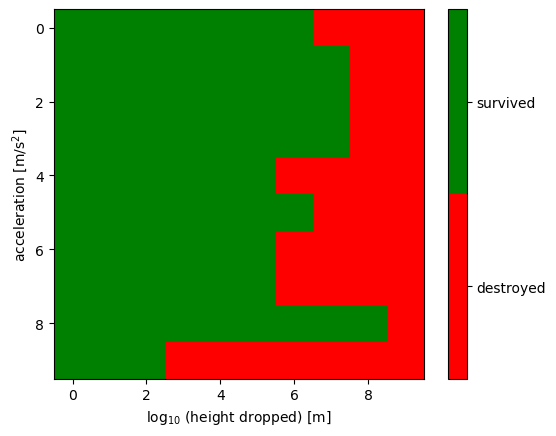

In [11]:
## heatmap v1
cmap = ListedColormap(['red', 'green'])
norm = BoundaryNorm([0.5, 1.5, 2.5], cmap.N)
plt.imshow(did_robot_survive, cmap=cmap, norm=norm)
cbar = plt.colorbar(ticks=[1, 2])
cbar.ax.set_yticklabels(['destroyed', 'survived'])
plt.xlabel(r"log$_{10}$ (height dropped) [m]")
plt.ylabel(r"acceleration [m/s$^2$]")
plt.show()

/var/folders/54/z17p5hhd7f328z5k3rhjvt6r0000gn/T/ipykernel_55690/2975743318.py:5: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(poszIs2D, acczIs2D, did_robot_survive, cmap=cmap, norm=norm)


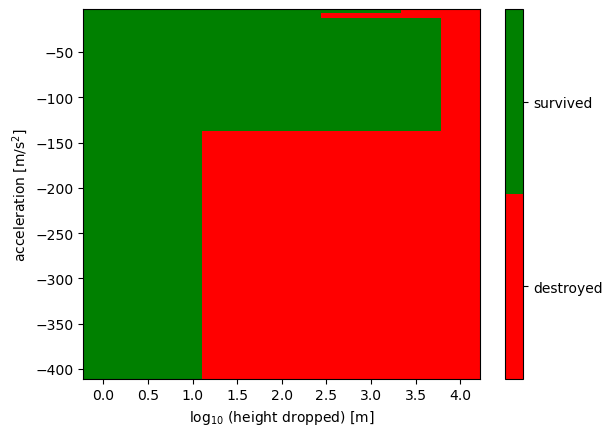

In [12]:
cmap = ListedColormap(['red', 'green'])
norm = BoundaryNorm([0.5, 1.5, 2.5], cmap.N)
poszIs2D, acczIs2D = np.meshgrid(poszIs, acczIs)
poszIs2D = np.log10(poszIs2D)
plt.pcolormesh(poszIs2D, acczIs2D, did_robot_survive, cmap=cmap, norm=norm)
plt.xlabel(r"log$_{10}$ (height dropped) [m]")
plt.ylabel(r"acceleration [m/s$^2$]")
cbar = plt.colorbar(ticks=[1, 2])
cbar.ax.set_yticklabels(['destroyed', 'survived'])
plt.show()

/var/folders/54/z17p5hhd7f328z5k3rhjvt6r0000gn/T/ipykernel_55690/2000435263.py:5: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(poszIs2D, acczIs2D, final_velzs, cmap = "inferno")


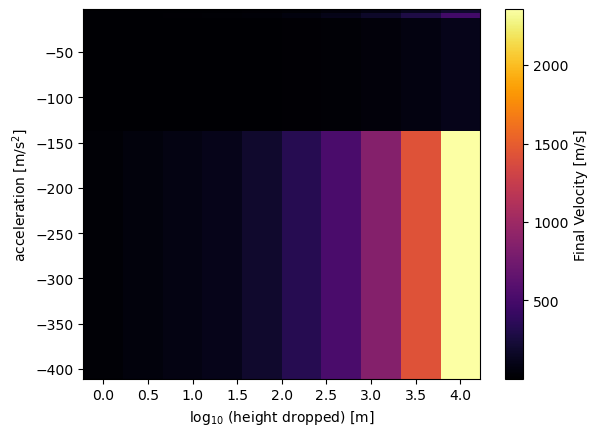

In [26]:
#cmap = ListedColormap(['red', 'green'])
#norm = BoundaryNorm([0.5, 1.5, 2.5], cmap.N)
poszIs2D, acczIs2D = np.meshgrid(poszIs, acczIs)
poszIs2D = np.log10(poszIs2D)
plt.pcolormesh(poszIs2D, acczIs2D, final_velzs, cmap = "inferno")
plt.xlabel(r"log$_{10}$ (height dropped) [m]")
plt.ylabel(r"acceleration [m/s$^2$]")
cbar = plt.colorbar()
cbar.set_label("Final Velocity [m/s]")
plt.show()

[[10.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [10.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [10.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [10.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [10.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 9.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 9.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 8.  1.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 4.  5.  0.  0.  0.  0.  1.  0.  0.  0.]
 [ 3.  3.  3.  0.  0.  0.  0.  0.  0.  1.]] [1.1160000e+00 2.3664440e+02 4.7217280e+02 7.0770120e+02 9.4322960e+02
 1.1787580e+03 1.4142864e+03 1.6498148e+03 1.8853432e+03 2.1208716e+03
 2.3564000e+03] <a list of 10 BarContainer objects>
[[4.90000000e+00 7.84000000e+00 1.27400000e+01 2.05800000e+01
  3.43000000e+01 5.78200000e+01 9.60400000e+01 1.59740000e+02
  2.65580000e+02 4.42960000e+02]
 [1.95000000e+00 3.08750000e+00 5.03750000e+00 8.45000000e+00
  1.39750000e+01 2.34000000e+01 3.90000000e+01 6.48375000e+01
  1.08225000e+02 1.80375000e+02]
 [2.96800000e+00 4.82300000e+00 7.79100000e+00 1.29850000e+01

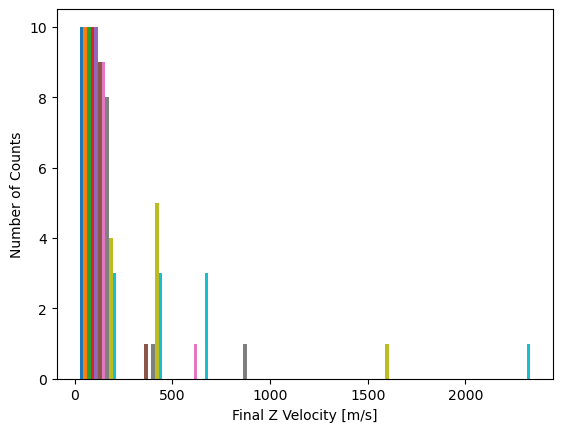

In [20]:
count, bins, patches = plt.hist(final_velzs, bins = 10)
plt.xlabel("Final Z Velocity [m/s]")
plt.ylabel("Number of Counts")
print(count, bins, patches)
print(final_velzs)

In [8]:
NewtonG = 6.67e-11 # m^3 kg^-1 s^-2 [N m^2 kg^-2]
gravEarth = 9.8 # m/s^2 gravitational acceleration close to Earth's surface

In [21]:
class GravitySolver:
    def __init__(self, dt, problem_type, NT, dataI):
        self.problem_type = problem_type
        self.dt = dt
        self.NT = NT
        self.A = dataI[9]
        self.D = dataI[10]
        self.M = dataI[11]
        self.Cp = dataI[12]
        
        self.init_constants()
        self.init_arrays()
        self.set_initial_conditions(dataI)

        self.simulate()
        self.clean_data()
        if "ISSProblem" in problem_type:
            self.plot_simulation_ISS()
        #self.save_results()
      #  if problem_type == "EarthSurfaceProblem":
       #     self.plot_simulation1D(self.data[3, :], self.data[6, :], self.data[9, :])
            
       # if problem_type == "GoalKickProblem":
         #   self.plot_simulation2D()

    def init_constants(self):
        self.G = 6.67e-11
        self.earthMass = 5.98e24
        self.gravEarth = 9.8 # m/s^2 gravitational acceleration close to Earth's surface
        
    def init_arrays(self):
        #self.data = np.zeros((?, NT))
        #time = 0, posx = 1, posy = 2, posz = 3, velx = 4, vely = 5, velz = 6, accx = 7, accy = 8, accz = 9
        self.data = np.zeros((10, NT))
        

    def set_initial_conditions(self, dataI):
        self.data[1:, 0] = dataI[:9]

    def update_time(self):
        return self.data[0, self.index-1] + self.dt
    
    def update_posx(self):
        if "GoalKickProblem" in problem_type:
            return self.data[1, self.index-1] + self.data[4, self.index-1] * self.dt
        
        if "ISSProblem" in problem_type:
            return self.data[1, self.index-1] + self.data[4, self.index-1]*self.dt \
            + 0.5*self.data[7, self.index-1]*self.dt**2
 
    def update_posy(self):
        if "GoalKickProblem" in problem_type or "ISSProblem" in problem_type:
            return self.data[2, self.index-1] + self.data[5, self.index-1] \
            * self.dt + 0.5 * self.data[8, self. index - 1] * self.dt**2

    def update_posz_theoretical(self):
        if "EarthSurfaceProblem" in problem_type:
            return self.data[3, 0] + self.data[6, 0]*self.data[0, self.index] + \
                   0.5 * self.data[9, 0] * self.data[0, self.index]**2

    def update_posz(self):
         if "EarthSurfaceProblem" in problem_type or "ISSProblem" in problem_type:
            return self.data[3, self.index-1] + self.data[6, self.index-1]*(self.dt) + \
               0.5 * self.data[9, self.index-1] * (self.dt)**2
        
    def update_velx(self):
        if "GoalKickProblem" in problem_type:
            return self.data[4, 0]
        
        if "ISSProblem" in problem_type:
            return self.data[4, self.index-1] + self.data[7, self.index-1]*self.dt

    def update_vely(self):
        if "GoalKickProblem" in problem_type or "ISSProblem" in problem_type:
            return self.data[5, self.index-1] + self.dt * self.data[8, self.index-1]

    def update_velz_theoretical(self):
        if "EarthSurfaceProblem" in problem_type:
            return self.data[6, 0] + self.data[10, self.index-1] * self.data[0, self.index]

    def update_velz(self):
        if "EarthSurfaceProblem" in problem_type or "ISSProblem" in problem_type:
            return self.data[6, self.index-1] + self.data[9, self.index-1] * (self.dt)
        
    def update_accx(self):
         if "ISSProblem" in problem_type:
            ISS_distances = np.sqrt(self.data[1, self.index-1]**2 + self.data[2, self.index-1]**2 \
            + self.data[3, self.index-1]**2)    
#             print("self.G:", self.G)
#             print("self.earthMass:", self.earthMass)
#             print("old posx:", self.data[1, self.index-1])
#             print("ISS_distances:", ISS_distances)
            return -self.G*self.earthMass*self.data[1, self.index-1]/ISS_distances**3
    
    def update_accy(self):
        if "GoalKickProblem" in problem_type:
            return self.data[8, self.index-1]
        
        if "ISSProblem" in problem_type:
            ISS_distances = np.sqrt(self.data[1, self.index-1]**2 + self.data[2, self.index-1]**2 \
            + self.data[3, self.index-1]**2)    
            return -self.G*self.earthMass*self.data[2, self.index-1]/ISS_distances**3

    def update_accz(self):
        if "EarthSurfaceProblem" in problem_type:
            return self.data[9, 0]
        
        if "drag" in problem_type:
            # drag = 1/2(Cp * density * A * v^2)                 
            drag_force = 0.5 * self.Cp * self.D * self.A * self.data[6, self.index-1]**2                 
            return self.data[9, 0] + (drag_force/1)
        
        if "ISSProblem" in problem_type:
            ISS_distances = np.sqrt(self.data[1, self.index-1]**2 + self.data[2, self.index-1]**2 \
            + self.data[3, self.index-1]**2)    
            return -self.G*self.earthMass*self.data[3, self.index-1]/ISS_distances**3
        
    def calculate_terminal_velocity(self):
        terminal_velocity = np.sqrt(np.abs((2*self.M*self.data[9, 0])/(self.Cp*self.D*self.A)))
        return terminal_velocity
            
    def simulate(self):
        for index in range(1,self.NT):
            self.index = index
            list_of_data = [self.update_time, self.update_posx, self.update_posy, self.update_posz, self.update_velx,
                           self.update_vely, self.update_velz, self.update_accx, self.update_accy, self.update_accz]
            
#             print("current time:", self.data[0, index-1])
#             print("posx:", self.data[1, index-1])
#             print("posy:", self.data[2, index-1])
#             print("posz:", self.data[3, index-1])
#             print("velx:", self.data[4, index-1])
#             print("vely:", self.data[5, index-1])
#             print("velz:", self.data[6, index-1])
#             print("accx:", self.data[7, index-1])
#             print("accy:", self.data[8, index-1])
#             print("accz:", self.data[9, index-1])
#             input(">>")
    
            for jj, function in enumerate(list_of_data):
                self.data[jj, self.index] = function()
            
            if self.problem_type == "EarthSurfaceProblem" and self.data[3, self.index] <= 0:
                break
                
            if self.problem_type == "GoalKickProblem" and self.data[2, self.index] <= 0:
                break

    def clean_data(self): 
        cleandata = []
        indices = np.where(self.data[0, :] > 0)[0]

        for i in range (self.data.shape[0]):
            cleandata.append(np.append(self.data[i, 0], self.data[i, indices]))
            
        self.data = cleandata
        self.data = np.array(self.data)
      

    def save_results(self):
        filename = "posz0_" + str(self.data[3, 0]) + "_accz0_" + str(self.data[9, 0]) + \
                    "_dt_" + str(self.data[0, 1] - self.data[0, 0]) + "_NT_" + str(self.dt) + ".npz"
            
        np.savez_compressed(filename, self.data)
        
    def plot_simulation1D(self, posz, velz, accz):
        fig,axs = plt.subplots(3)

        yvalues = [posz, velz, accz]
        ylabels = ["z-position [m]", "z-velocity [m/s]", r"z-acceleration [m/s$^2$]"]
        for self.index in range(len(yvalues)):
            axs[self.index].plot(self.data[0, :], yvalues[self.index])
            axs[self.index].set_ylabel(ylabels[self.index])

        # axs[0].plot(times, posz)
        # axs[1].plot(times, velz)
        # axs[2].plot(times, accz)

        axs[0].set_xlabel("time [s]")
        plt.show()
        self.the_plot = plt.gca()
        
    def plot_simulation2D(self):
        fig, axs = plt.subplots(4, figsize=(10, 20))
        axs[0].plot(self.data[0, :], self.data[2, :], color="blue")
        axs[1].plot(self.data[0, :], self.data[5, :], color="green")
        axs[2].plot(self.data[0, :], self.data[1, :], color="red")
        axs[3].plot(self.data[0, :], self.data[4, :], color="orange")

        axs[0].set_xlabel("Time [s]")
        axs[0].set_ylabel("Height [m]")
        axs[1].set_xlabel("Time [s]")
        axs[1].set_ylabel("Vertical Velocity [m/s]")
        axs[2].set_xlabel("Time [s]")
        axs[2].set_ylabel("Displacement [m]")
        axs[3].set_xlabel("Time [s]")
        axs[3].set_ylabel("Horizontal Velocity [m/s]")

        plt.show()
        
    def plot_simulation_ISS(self):
        ISS_distances = np.sqrt(self.data[1, :]**2 + self.data[2, :]**2 \
            + self.data[3, :]**2)  
        plt.plot(self.data[0, :], ISS_distances)
        plt.xlabel("time [seconds]")
        plt.ylabel("ISS distance from center of Earth [meters]")
        plt.show()
        plt.close()
        
        plt.plot(self.data[1, :], self.data[2, :], "o")
        plt.xlabel("x [m]")
        plt.ylabel("y [m]")
        plt.ylim(-ISS_distances[0]*10, ISS_distances[0]*10)
        plt.xlim(-ISS_distances[0]*10, ISS_distances[0]*10)
        plt.show()

In [22]:
'''
dt = 0.1
problem_type = "EarthSurfaceProblem"
NT = 10000
posxI = 0
posyI = 0
velxI = 0
velyI = 0
velzI = 0
accxI = 0
accyI = 0
        
#angle = 45
#angle = np.radians(angle)
#velxI = 15 * np.cos(angle)
#velyI = 10 * np.sin(angle)

#dataI = [0, 0, 0, velxI, velyI, 0, -9.8, 0, 0, 1, 1.3, 1, 1]

poszIs = np.logspace(np.log10(1), np.log10(10000), 10)

#Fg = G * M * m / r^2
#ag = Fg/m = G * M / r^2
R_Trappist1c = 7e6 # [meters] radius
M_Trappist1c = 8.237e24 # [kg] mass
a_Trappist1c = -NewtonG * M_Trappist1c / R_Trappist1c**2
print(a_Trappist1c)

#         earth, moon,   mars, Io,    Trappist1c,  Venus, Neptune, Jupiter, Pluto, Sun
acczIs = [-9.8, -1.625, -3.71, -1.81, a_Trappist1c, -8.87, -11.15, -24.79, -0.62, -274]

#acczIs = [-9.8, -1.625, -3.71, -1.81, a_Trappist1c]

dataI = [posxI, posyI, poszIs[0], velxI, velyI, velzI, accxI, accyI, acczIs[0], 1, 1.3, 1, 1]

gravitySolverObjects = []
for acczI in acczIs:
    dataI[8] = acczI
    for poszI in poszIs:
        dataI[2] = poszI
        gravitySolverObject = GravitySolver(dt, problem_type, NT, dataI)
        gravitySolverObjects.append(gravitySolverObject)
        
## plot heatmap of survived = green, destroyed = red
did_robot_survive = []
final_velzs = []
velz_survival_threshold = -100 # m/s
for gravitySolverObject in gravitySolverObjects:
    final_velzs.append(np.abs(gravitySolverObject.data[6, -1])) 
    if np.abs(gravitySolverObject.data[6,-1]) >= np.abs(velz_survival_threshold):
        did_robot_survive.append(1)
        print("destroyed!")
    else:
        did_robot_survive.append(2)
        print("survived!")
        
did_robot_survive = np.array(did_robot_survive)
did_robot_survive = did_robot_survive.reshape((len(poszIs), len(acczIs)))

final_velzs = np.array(final_velzs)
#print(final_velzs)
final_velzs = final_velzs.reshape((len(poszIs), len(acczIs)))
'''

'\ndt = 0.1\nproblem_type = "EarthSurfaceProblem"\nNT = 10000\nposxI = 0\nposyI = 0\nvelxI = 0\nvelyI = 0\nvelzI = 0\naccxI = 0\naccyI = 0\n        \n#angle = 45\n#angle = np.radians(angle)\n#velxI = 15 * np.cos(angle)\n#velyI = 10 * np.sin(angle)\n\n#dataI = [0, 0, 0, velxI, velyI, 0, -9.8, 0, 0, 1, 1.3, 1, 1]\n\nposzIs = np.logspace(np.log10(1), np.log10(10000), 10)\n\n#Fg = G * M * m / r^2\n#ag = Fg/m = G * M / r^2\nR_Trappist1c = 7e6 # [meters] radius\nM_Trappist1c = 8.237e24 # [kg] mass\na_Trappist1c = -NewtonG * M_Trappist1c / R_Trappist1c**2\nprint(a_Trappist1c)\n\n#         earth, moon,   mars, Io,    Trappist1c,  Venus, Neptune, Jupiter, Pluto, Sun\nacczIs = [-9.8, -1.625, -3.71, -1.81, a_Trappist1c, -8.87, -11.15, -24.79, -0.62, -274]\n\n#acczIs = [-9.8, -1.625, -3.71, -1.81, a_Trappist1c]\n\ndataI = [posxI, posyI, poszIs[0], velxI, velyI, velzI, accxI, accyI, acczIs[0], 1, 1.3, 1, 1]\n\ngravitySolverObjects = []\nfor acczI in acczIs:\n    dataI[8] = acczI\n    for poszI in p

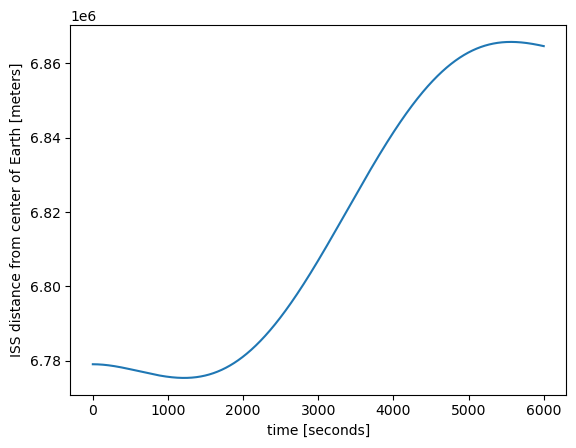

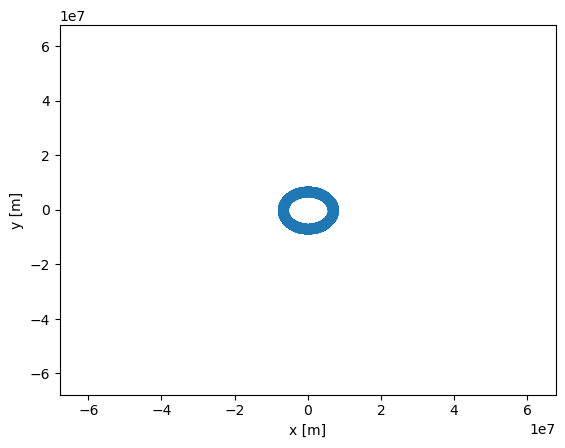

In [23]:
ISS_altitude = 4.09e5 # meters
Earth_radius = 6.37e6 # meters
G = 6.67e-11 # m^3 * kg^-1 * s^-2 [N * m^2 / kg^2]
Earth_mass = 5.97e24 # kg
ISS_distances0 = ISS_altitude + Earth_radius
ISS_velocities0 = np.sqrt(G*Earth_mass / ISS_distances0)
ISS_accelerations0 = G*Earth_mass / ISS_distances0**2

dataI = [ISS_distances0, 0, 0, 0, ISS_velocities0, 0, -ISS_accelerations0, 0, 0, 0, 0, 0, 0]

NT = 10000
dt = 0.6

problem_type = "ISSProblem"

gravitySolverObject = GravitySolver(dt, problem_type, NT, dataI)